In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Impact of step-size on step-size updates


In [2]:
alphas = 2 ** np.arange(-15, -2, dtype=np.float32)
betas = np.log(alphas)
grads = [0.01, 0.1, 0.5, 1.0]
meta_step_sizes = [0.01, 0.1, 0.5, 1.0]

# Create lists to store results
data = {
    'alpha': [],
    'alpha_exponent': [],
    'beta': [],
    'grad': [],
    'meta_step_size': [],
    'alpha_frac_change': [],
    'alt_alpha_frac_change': [],
}

for grad in grads:
    for meta_step_size in meta_step_sizes:
        new_betas = betas + meta_step_size * grad * alphas * grad
        new_alphas = np.exp(new_betas)
        alpha_frac_change = (new_alphas - alphas) / alphas
        
        alt_new_betas = betas + meta_step_size / alphas * grad * alphas * grad
        alt_new_alphas = np.exp(alt_new_betas)
        alt_alpha_frac_change = (alt_new_alphas - alphas) / alphas
        
        # Add rows for this parameter combination
        for alpha, beta, frac_change, alt_frac_change in zip(alphas, betas, alpha_frac_change, alt_alpha_frac_change):
            data['alpha'].append(alpha)
            data['alpha_exponent'].append(int(np.log2(alpha)))
            data['beta'].append(beta)
            data['grad'].append(grad)
            data['meta_step_size'].append(meta_step_size)
            data['alpha_frac_change'].append(frac_change)
            data['alt_alpha_frac_change'].append(alt_frac_change)
            

df = pd.DataFrame(data)

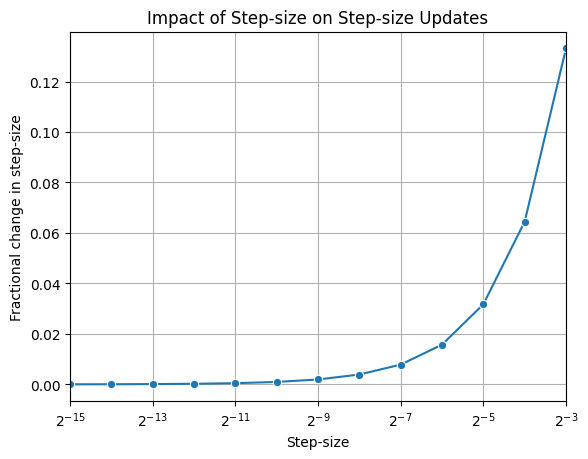

In [3]:
plot_df = df[
    (df['grad'] == 1) &
    (df['meta_step_size'] == 1)
]

alpha_exponents = plot_df['alpha_exponent'].values

fig = sns.lineplot(
    data = plot_df,
    x = 'alpha_exponent',
    y = 'alpha_frac_change',
    marker = 'o',
)

plt.title('Impact of Step-size on Step-size Updates')

plt.xlabel('Step-size')
plt.ylabel('Fractional change in step-size')

plt.xlim(alpha_exponents[0], alpha_exponents[-1])

plt.xticks(
    alpha_exponents[::2],
    [f'$2^{{{int(a)}}}$' for a in alpha_exponents][::2],
)

plt.grid(True)
plt.show()

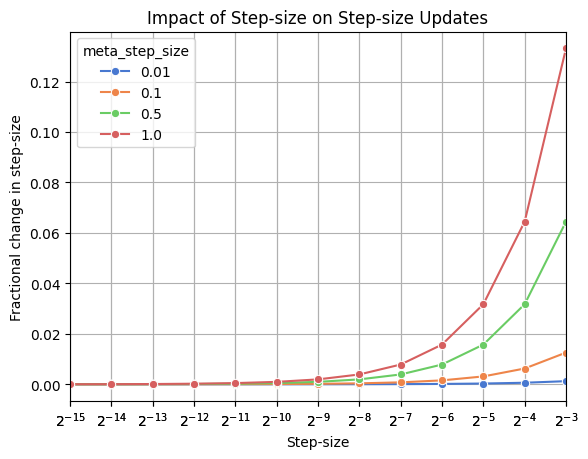

In [4]:
plot_df = df[(df['grad'] == 1)]

alpha_exponents = plot_df['alpha_exponent'].values

fig = sns.lineplot(
    data = plot_df,
    x = 'alpha_exponent',
    y = 'alpha_frac_change',
    hue = 'meta_step_size',
    marker = 'o',
    palette = 'muted',
)

plt.title('Impact of Step-size on Step-size Updates')

plt.xlabel('Step-size')
plt.ylabel('Fractional change in step-size')


plt.xlim(alpha_exponents[0], alpha_exponents[-1])

plt.xticks(
    alpha_exponents[::2],
    [f'$2^{{{int(a)}}}$' for a in alpha_exponents][::2],
)

plt.grid(True)
plt.show()

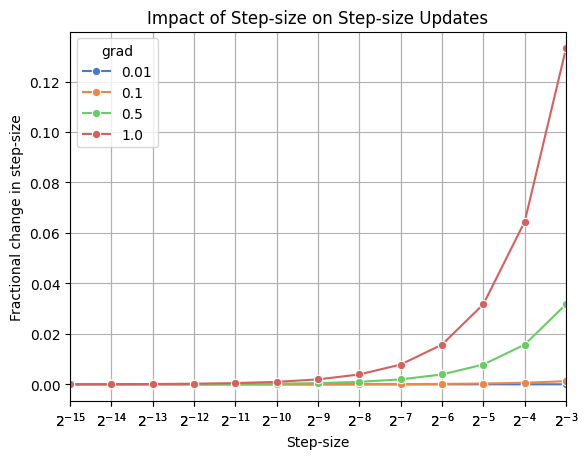

In [5]:
plot_df = df[(df['meta_step_size'] == 1)]

alpha_exponents = plot_df['alpha_exponent'].values

fig = sns.lineplot(
    data = plot_df,
    x = 'alpha_exponent',
    y = 'alpha_frac_change',
    hue = 'grad',
    marker = 'o',
    palette = 'muted',
)

plt.title('Impact of Step-size on Step-size Updates')

plt.xlabel('Step-size')
plt.ylabel('Fractional change in step-size')


plt.xlim(alpha_exponents[0], alpha_exponents[-1])

plt.xticks(
    alpha_exponents[::2],
    [f'$2^{{{int(a)}}}$' for a in alpha_exponents][::2],
)

plt.grid(True)
plt.show()

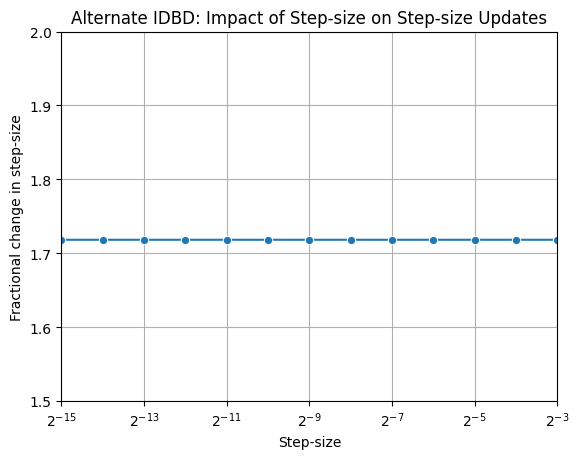

In [17]:
plot_df = df[
    (df['grad'] == 1) &
    (df['meta_step_size'] == 1)
]

alpha_exponents = plot_df['alpha_exponent'].values

fig = sns.lineplot(
    data = plot_df,
    x = 'alpha_exponent',
    y = 'alt_alpha_frac_change',
    marker = 'o',
)

plt.title('Alternate IDBD: Impact of Step-size on Step-size Updates')

plt.xlabel('Step-size')
plt.ylabel('Fractional change in step-size')

plt.xlim(alpha_exponents[0], alpha_exponents[-1])
plt.ylim(1.5, 2.0)

plt.xticks(
    alpha_exponents[::2],
    [f'$2^{{{int(a)}}}$' for a in alpha_exponents][::2],
)

plt.grid(True)
plt.show()

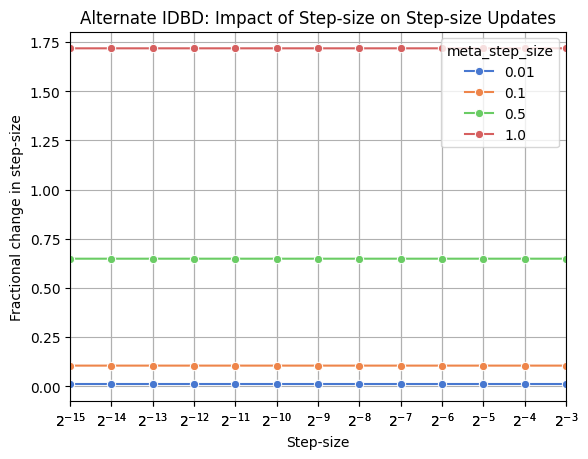

In [18]:
plot_df = df[(df['grad'] == 1)]

alpha_exponents = plot_df['alpha_exponent'].values

fig = sns.lineplot(
    data = plot_df,
    x = 'alpha_exponent',
    y = 'alt_alpha_frac_change',
    hue = 'meta_step_size',
    marker = 'o',
    palette = 'muted',
)

plt.title('Alternate IDBD: Impact of Step-size on Step-size Updates')

plt.xlabel('Step-size')
plt.ylabel('Fractional change in step-size')


plt.xlim(alpha_exponents[0], alpha_exponents[-1])

plt.xticks(
    alpha_exponents[::2],
    [f'$2^{{{int(a)}}}$' for a in alpha_exponents][::2],
)

plt.grid(True)
plt.show()

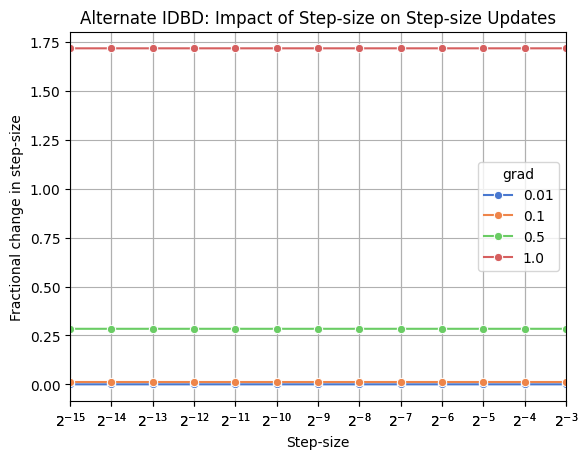

In [20]:
plot_df = df[(df['meta_step_size'] == 1)]

alpha_exponents = plot_df['alpha_exponent'].values

fig = sns.lineplot(
    data = plot_df,
    x = 'alpha_exponent',
    y = 'alt_alpha_frac_change',
    hue = 'grad',
    marker = 'o',
    palette = 'muted',
)

plt.title('Alternate IDBD: Impact of Step-size on Step-size Updates')

plt.xlabel('Step-size')
plt.ylabel('Fractional change in step-size')


plt.xlim(alpha_exponents[0], alpha_exponents[-1])

plt.xticks(
    alpha_exponents[::2],
    [f'$2^{{{int(a)}}}$' for a in alpha_exponents][::2],
)

plt.grid(True)
plt.show()

## Impact of loss responsibility on step-size updates

In [22]:
alpha_init = 0.001
beta_init = np.log(alpha_init)
meta_step_size = 1.0
init_weight_values = [0.0]
loss_responsibilities = [0.0, 0.25, 0.5, 0.75, 1.0]
seeds = np.arange(100)
n_samples = 10000

# Create lists to store results
data = {
    'meta_step_size': [],
    'init_weight_value': [],
    'loss_responsibility': [],
    'step': [],
    'alpha': [],
    'alpha_frac_change': [],
    'seed': [],
}

for init_weight_value in init_weight_values:
    for loss_responsibility in loss_responsibilities:
        for seed in seeds:
            np.random.seed(seed)
            
            h = np.array(0)
            w = np.array(init_weight_value)
            beta = np.array(beta_init)
            alpha = np.array(alpha_init)
            step_sizes = [alpha]
            inputs = np.random.randn(n_samples)
            random_inputs = np.random.randn(n_samples)
            
            for i in range(n_samples):
                input = inputs[i]
                random_input = random_inputs[i]
                
                loss = (1 - loss_responsibility) * random_input + loss_responsibility * input * w
                
                grad = loss * input
                beta += meta_step_size * grad * h
                prev_alpha = alpha
                alpha = np.clip(np.exp(beta), 0, 100)
                w += alpha * grad
                h = h * np.maximum(1 - alpha * input ** 2, 0) + alpha * grad
                
                step_sizes.append(alpha)
                
                data['meta_step_size'].append(meta_step_size)
                data['init_weight_value'].append(init_weight_value)
                data['loss_responsibility'].append(loss_responsibility)
                data['step'].append(i)
                data['alpha'].append(alpha)
                data['alpha_frac_change'].append((alpha - prev_alpha) / prev_alpha)
                data['seed'].append(seed)
            

df = pd.DataFrame(data)

/tmp/ipykernel_4463/1008918405.py:42: RuntimeWarning: overflow encountered in exp
  alpha = np.clip(np.exp(beta), 0, 100)
/tmp/ipykernel_4463/1008918405.py:53: RuntimeWarning: invalid value encountered in scalar divide
  data['alpha_frac_change'].append((alpha - prev_alpha) / prev_alpha)
/tmp/ipykernel_4463/1008918405.py:53: RuntimeWarning: divide by zero encountered in scalar divide
  data['alpha_frac_change'].append((alpha - prev_alpha) / prev_alpha)
/tmp/ipykernel_4463/1008918405.py:40: RuntimeWarning: overflow encountered in scalar multiply
  beta += meta_step_size * grad * h
/tmp/ipykernel_4463/1008918405.py:43: RuntimeWarning: overflow encountered in scalar multiply
  w += alpha * grad
/tmp/ipykernel_4463/1008918405.py:44: RuntimeWarning: overflow encountered in scalar multiply
  h = h * np.maximum(1 - alpha * input ** 2, 0) + alpha * grad
/tmp/ipykernel_4463/1008918405.py:44: RuntimeWarning: invalid value encountered in scalar multiply
  h = h * np.maximum(1 - alpha * input ** 2

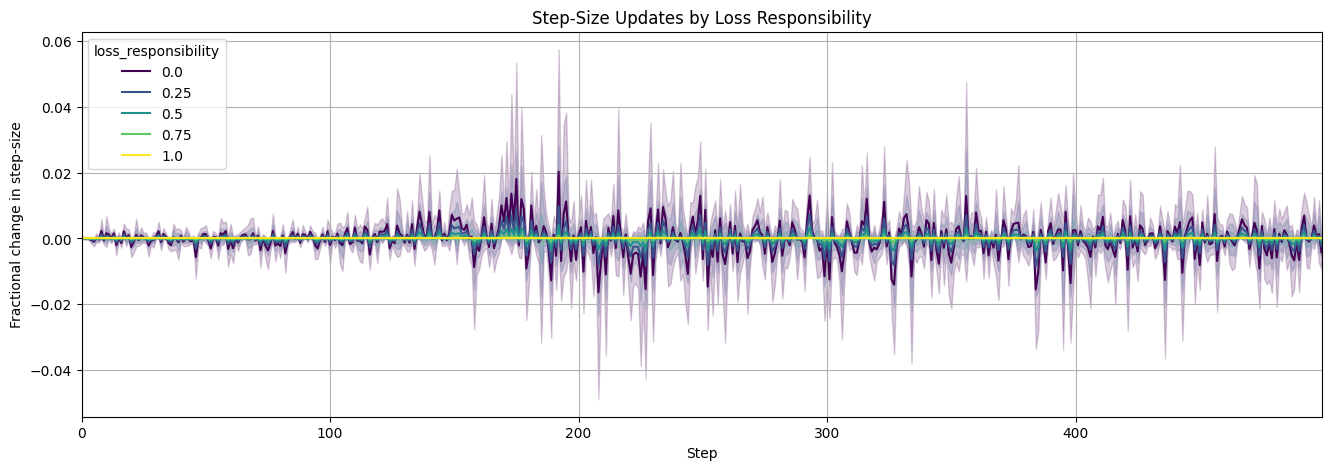

In [19]:
plt.figure(figsize=(16, 5))

plot_df = df[(df['seed'] >= 0) & (df['seed'] < 10)]

sns.lineplot(
    data = plot_df,
    x = 'step',
    y = 'alpha_frac_change',
    hue = 'loss_responsibility',
    palette = 'viridis',
)

plt.title('Step-Size Updates by Loss Responsibility')

plt.xlabel('Step')
plt.ylabel('Fractional change in step-size')


plt.xlim(plot_df['step'].min(), plot_df['step'].max())

plt.grid(True)
plt.show()

/tmp/ipykernel_4463/60428140.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


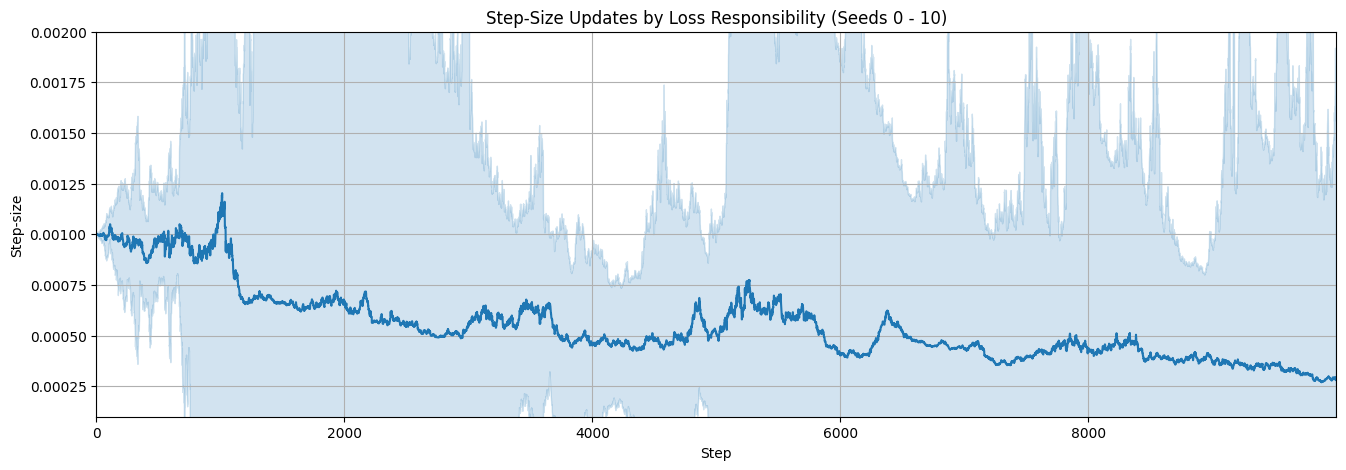

/tmp/ipykernel_4463/60428140.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


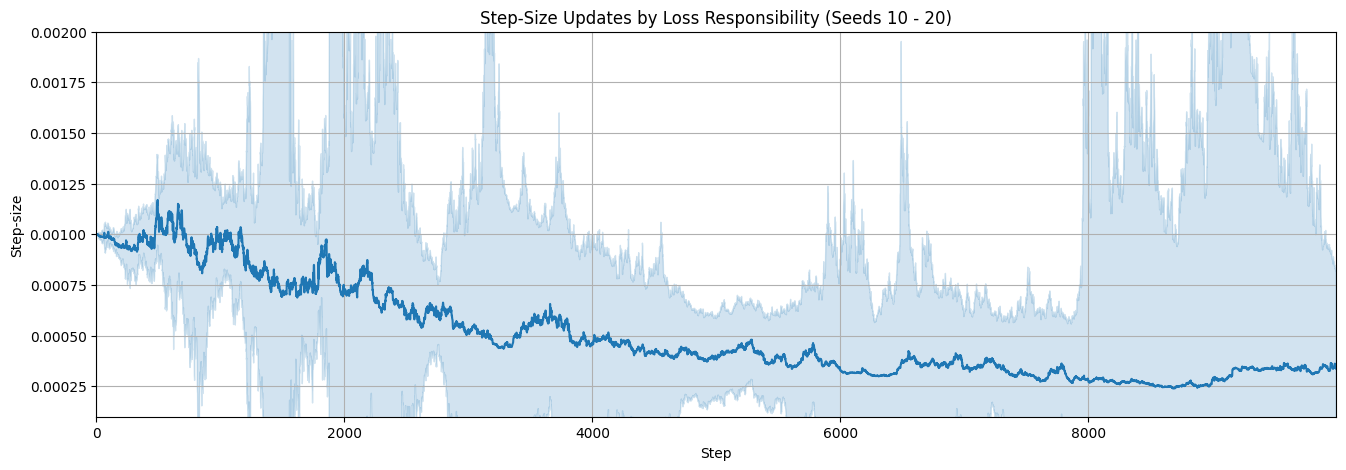

/tmp/ipykernel_4463/60428140.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


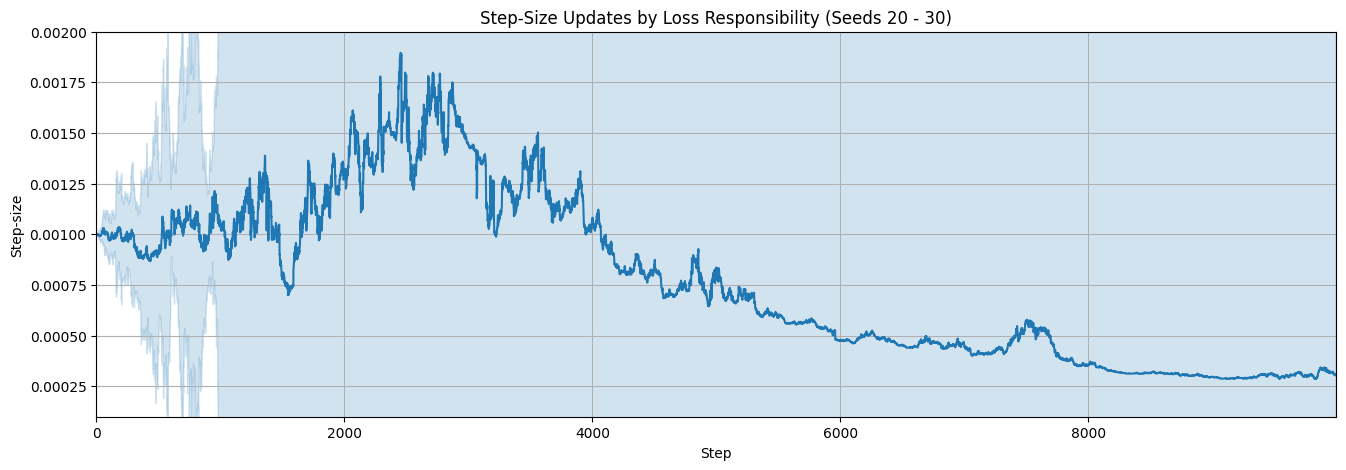

/tmp/ipykernel_4463/60428140.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


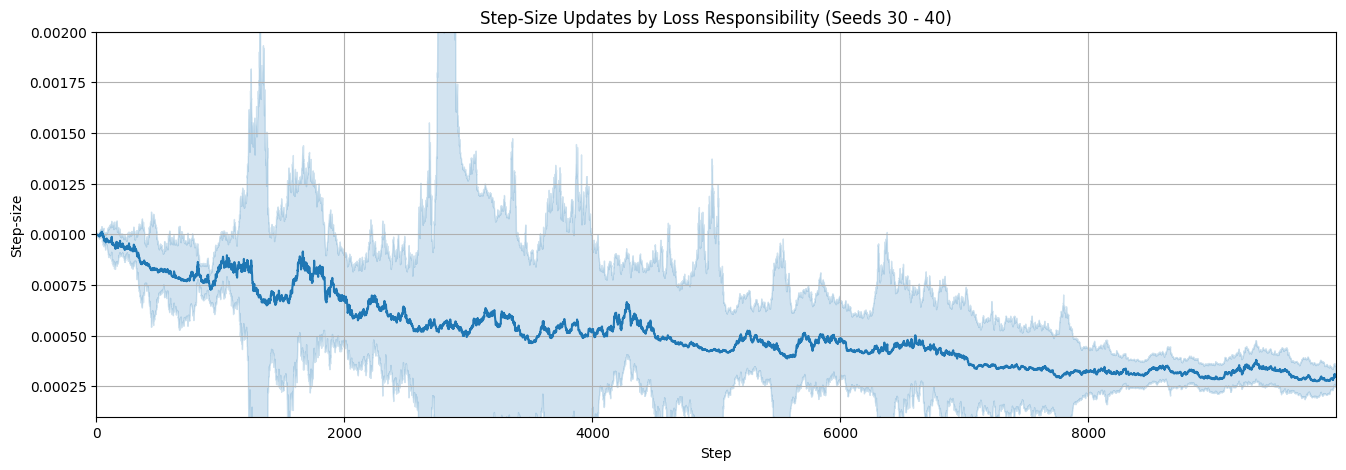

/tmp/ipykernel_4463/60428140.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(


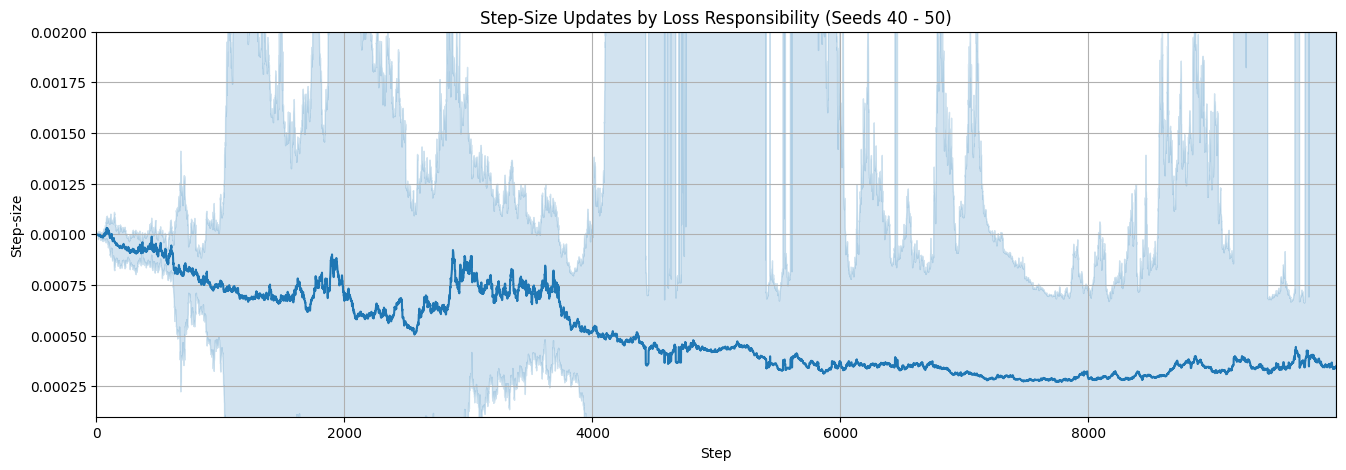

In [25]:
for plot_idx in range(0, 50, 10):
    plt.figure(figsize=(16, 5))

    plot_df = df[(df['loss_responsibility'] == 0.0) & (df['seed'] >= plot_idx) & (df['seed'] < plot_idx + 10)]
    sns.lineplot(
        data=plot_df,
        x='step',
        y='alpha',
        palette='viridis',
        estimator='median',
        errorbar=('sd', 0.95),
        n_boot=100
    )

    plt.title(f'Step-Size Updates by Loss Responsibility (Seeds {plot_idx} - {plot_idx + 10})')

    plt.xlabel('Step')
    plt.ylabel('Step-size')


    plt.xlim(plot_df['step'].min(), plot_df['step'].max())
    plt.ylim(0.0001, 0.002)

    plt.grid(True)
    plt.show()

KeyboardInterrupt: 

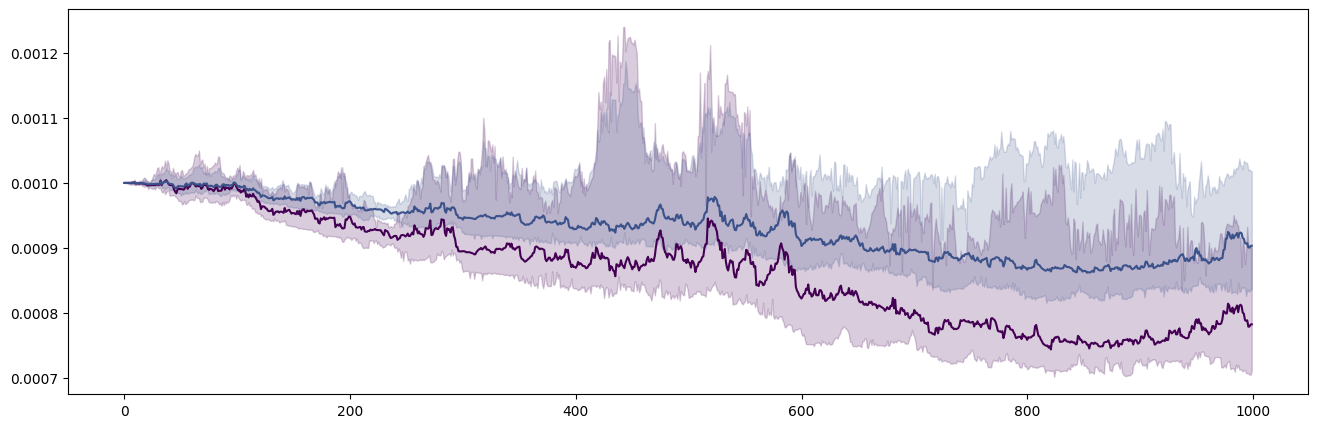

In [11]:
for plot_idx in range(0, 50, 10):
    plt.figure(figsize=(16, 5))

    plot_df = df[(df['seed'] >= plot_idx) & (df['seed'] < plot_idx + 10)]
    sns.lineplot(
        data=plot_df,
        x='step',
        y='alpha', 
        hue='loss_responsibility',
        palette='viridis',
        estimator='median',
        errorbar=('ci', 95),
        n_boot=1000
    )

    plt.title(f'Step-Size Updates by Loss Responsibility (Seeds {plot_idx} - {plot_idx + 10})')

    plt.xlabel('Step')
    plt.ylabel('Step-size')


    plt.xlim(plot_df['step'].min(), plot_df['step'].max())

    plt.grid(True)
    plt.show()

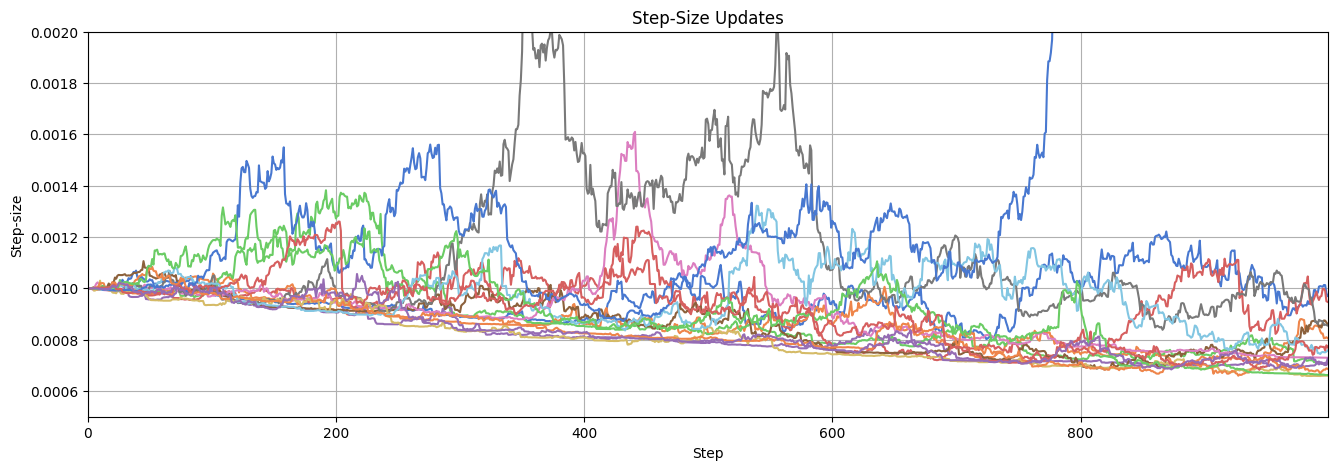

In [9]:
plt.figure(figsize=(16, 5))

plot_df = df[(df['loss_responsibility'] == 0.0) & (df['seed'] >= 0) & (df['seed'] < 15)]

sns.lineplot(
    data = plot_df,
    x = 'step',
    y = 'alpha',
    hue = 'seed',
    palette = 'muted',
    legend = False,
)

plt.title(f'Step-Size Updates')

plt.xlabel('Step')
plt.ylabel('Step-size')

plt.xlim(plot_df['step'].min(), plot_df['step'].max())
plt.ylim(0.0005, 0.002)

plt.grid(True)
plt.show()